## Wprowadzenie do OpenCV

Kilka podstawowych rzeczy, które należy wiedzieć o OpenCV - na przykładach.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Podstawowym obiektem w pythonowskim API OpenCV jest tablica NumPy. Najczęściej bywają typu `uint8` (0-255), ale można pracować na obrazach `float32` (0.0-1.0) lub innych - niektóre funkcje oczekują konkretnych typów na wejściu i należy zwracać na to uwagę.

Za input/output odpowiadają funkcje [`cv2.imread`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) i [`cv2.imwrite`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce).
Dokumentacja OpenCV dotyczy implementacji C++, ale z reguły będziesz w stanie wydedukować o co chodzi (`const String &` == `str`, itd).

In [12]:
img = cv2.imread("Lena.jpg")
print(type(img))
print(img.dtype)

<class 'numpy.ndarray'>
uint8


Obrazy monochromatyczne mają dwa wymiary (szerokość i wysokość), dla obrazów kolorowych dochodzi trzeci wymiar, tzw. _kanał_, kodujący w określony sposób informację o kolorze. Domyślną przestrzenią barw w OpenCV jest BGR (nie mylić z RGB), ale możemy przechodzić między różnymi innymi przestrzeniami.

In [13]:
img.shape

(675, 1200, 3)

Proste operacje na obrazach przeprowadzamy jak na zwykłych macierzach. Np. aby wybrać pojedynczy kanał obrazu:

In [14]:
red = img[..., 2]  # 0 - Blue, 1 - Green, 2 - Red
red.shape

(675, 1200)

Albo, by wyciąć fragment obrazu:

In [15]:
crop = img[210:310, 220:370, :]
crop.shape  # wynik nie jest kopią, a widokiem - może być użyteczne

(100, 150, 3)

Możesz stworzyć nowy obraz tak, jak każdą inną macierz numpy. Pamiętaj jednak o poprawnym układzie wymiarów i typie danych!

In [16]:
nowy = np.zeros((32, 32), dtype=np.uint8)
nowy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

OpenCV ma wbudowane funkcje do wyświetlania, [`cv2.imshow`](https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) i powiązaną [`cv2.waitKey`](https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7), ale nadają się one bardziej do pisania samodzielnych aplikacji niż pracy w notebookach, gdyż powodują one wyświetlenie osobnego okna.
Do wyświetlania obrazów w notebookach możesz skorzystać z `PIL.Image` albo `matplotlib.pyplot.imshow`.

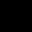

In [10]:
Image.fromarray(nowy)

`PIL.Image` oczekuje obrazów monochromatycznych albo RGB, więc w przypadku obrazów kolorowych pamiętaj o konwersji do odpowiedniej przestrzeni!

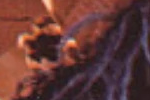

In [17]:
Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

Więcej możliwości poznasz na zajęciach oraz we własnym zakresie.

(array([  1.,   1.,   0.,   1.,   4.,   0.,   7.,  11.,   0.,  12.,   0.,
         22.,  25.,   0.,  37.,  62.,   0.,  74.,   0.,  99., 125.,   0.,
        159., 212.,   0., 290., 328.,   0., 355.,   0., 347., 326.,   0.,
        334., 295.,   0., 281.,   0., 264., 237.,   0., 226., 228.,   0.,
        267., 251.,   0., 265.,   0., 263., 306.,   0., 334., 327.,   0.,
        380.,   0., 339., 371.,   0., 313., 334.,   0., 281., 307.,   0.,
        244.,   0., 250., 222.,   0., 237., 227.,   0., 244.,   0., 233.,
        220.,   0., 203., 226.,   0., 233., 206.,   0., 198.,   0., 193.,
        184.,   0., 178., 184.,   0., 138.,   0., 162., 150.,   0., 140.,
        135.,   0., 141., 116.,   0., 123.,   0., 109.,  82.,   0.,  91.,
         60.,   0.,  55.,   0.,  76.,  59.,   0.,  66.,  53.,   0.,  48.,
         57.,   0.,  50.,   0.,  48.,  54.,   0.,  50.,  31.,   0.,  32.,
          0.,  37.,  19.,   0.,  23.,  25.,   0.,  26.,  22.,   0.,  25.,
          0.,  20.,  21.,   0.,  16., 

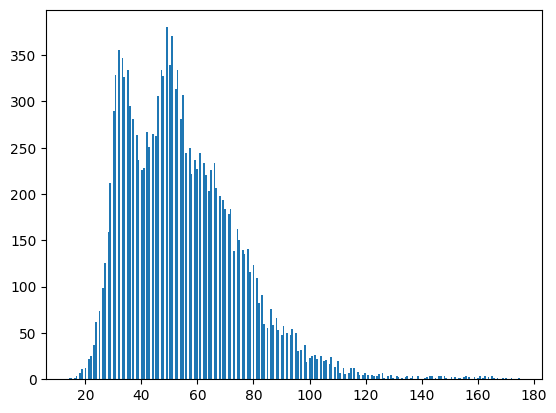

In [18]:
plt.hist(crop[..., 0].flatten(), bins=255)